<a href="https://colab.research.google.com/github/WarunaDissanayake1234/MNIST-Digit-Classification-with-Neural-Network/blob/main/MNIST_Digit_Classification_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Impoting dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST dataset from keras

In [ ]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy array
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Trining data = 60000

test data = 10000

Image dimension -->28 * 28

Gray scale images -- 1 color channel

In [ ]:
# printing some image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

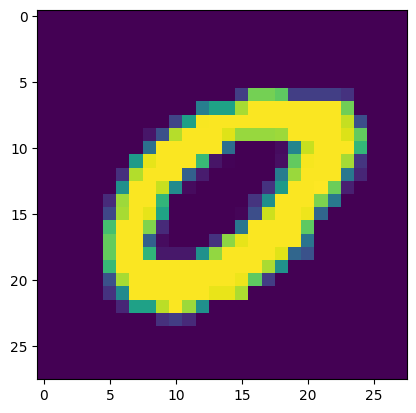

0


In [ ]:
# displaying the images

plt.imshow(X_train[7685])
plt.show()

# print the corresponding label
print(Y_train[7685])


In [ ]:
# Image labels

print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these images as such or we can also apply one hot encoding

All the Images have the same diamensions in this dataset,If not , we have to resize the all images to common diamensions

In [ ]:
# scaling the values between 0 to 1
X_train = X_train/255
X_test = X_test/255

In [ ]:
# printing some image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Biulding the Neurel Network



In [ ]:
# setting the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

In [ ]:
# compiling the Neural nnetwork

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Neural network

model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2978 - accuracy: 0.9141
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1383 - accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1026 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0833 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0689 - accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0601 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0470 - accuracy: 0.9843
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0421 - accuracy: 0.9860
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.036

Evaluating the model

In [ ]:
# Accuracy on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9749
0.9749000072479248


In [ ]:
print(X_test.shape)

(10000, 28, 28)


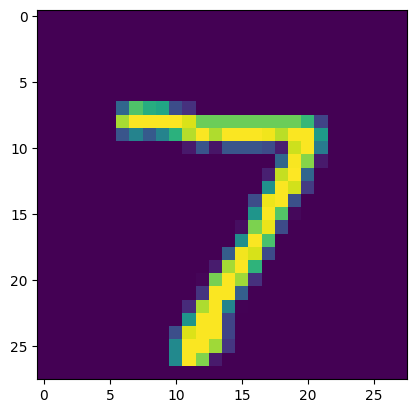

In [ ]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
print(Y_pred.shape)


(10000, 10)


In [ ]:
print(Y_pred[0])

[1.0394108e-01 1.8207804e-07 8.1420382e-03 8.2386863e-01 1.6622669e-08
 3.7708143e-03 3.6213774e-10 9.9997163e-01 1.4418917e-02 2.5956281e-02]


model.predict() give the prediction probability of each class for that data point

In [ ]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# Converting the prediction propabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 8, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> true labels

Y_pred_labels --> Predicted Labels

In [ ]:
# Confusion Metrics
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 969    0    1    2    0    2    2    0    3    1]
 [   0 1116    5    1    0    1    2    1    9    0]
 [   2    2 1012    4    4    0    1    3    4    0]
 [   0    0    8  980    0    9    0    4    3    6]
 [   1    0    7    0  953    3    1    1    1   15]
 [   3    0    0    7    1  869    3    0    6    3]
 [   9    2    1    1    2    4  936    0    3    0]
 [   2    3   14    4    0    0    0  995    1    9]
 [   5    0    4    8    4    3    1    5  941    3]
 [   1    3    0    4    6    2    0   12    2  979]], shape=(10, 10), dtype=int32)


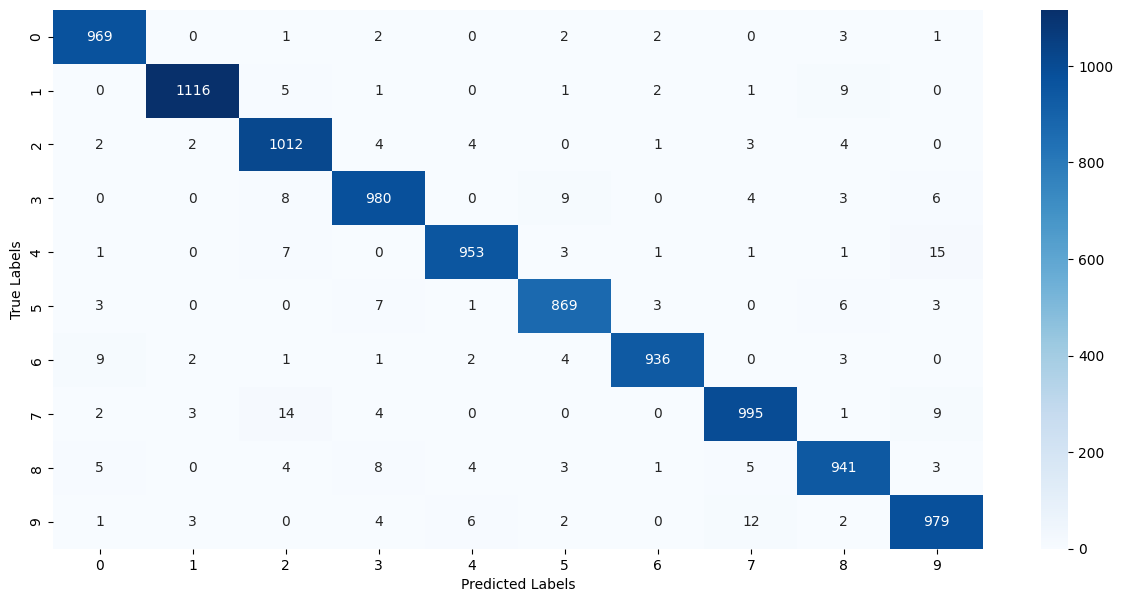

In [ ]:
plt.figure(figsize = (15, 7))
sns.heatmap(conf_mat, annot = True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

True - Pred

0   -  0

969 photos correctly predicted by this model

Lets build the predictive system

In [ ]:
input_image_path = '/content/sample_image.png'

input_image = cv2.imread('/content/sample_image.png')

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[198 198 198]
  [198 198 198]
  [  0   0   0]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 ...

 [[228 228 228]
  [228 228 228]
  [  0   0   0]
  ...
  [228 228 228]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]]


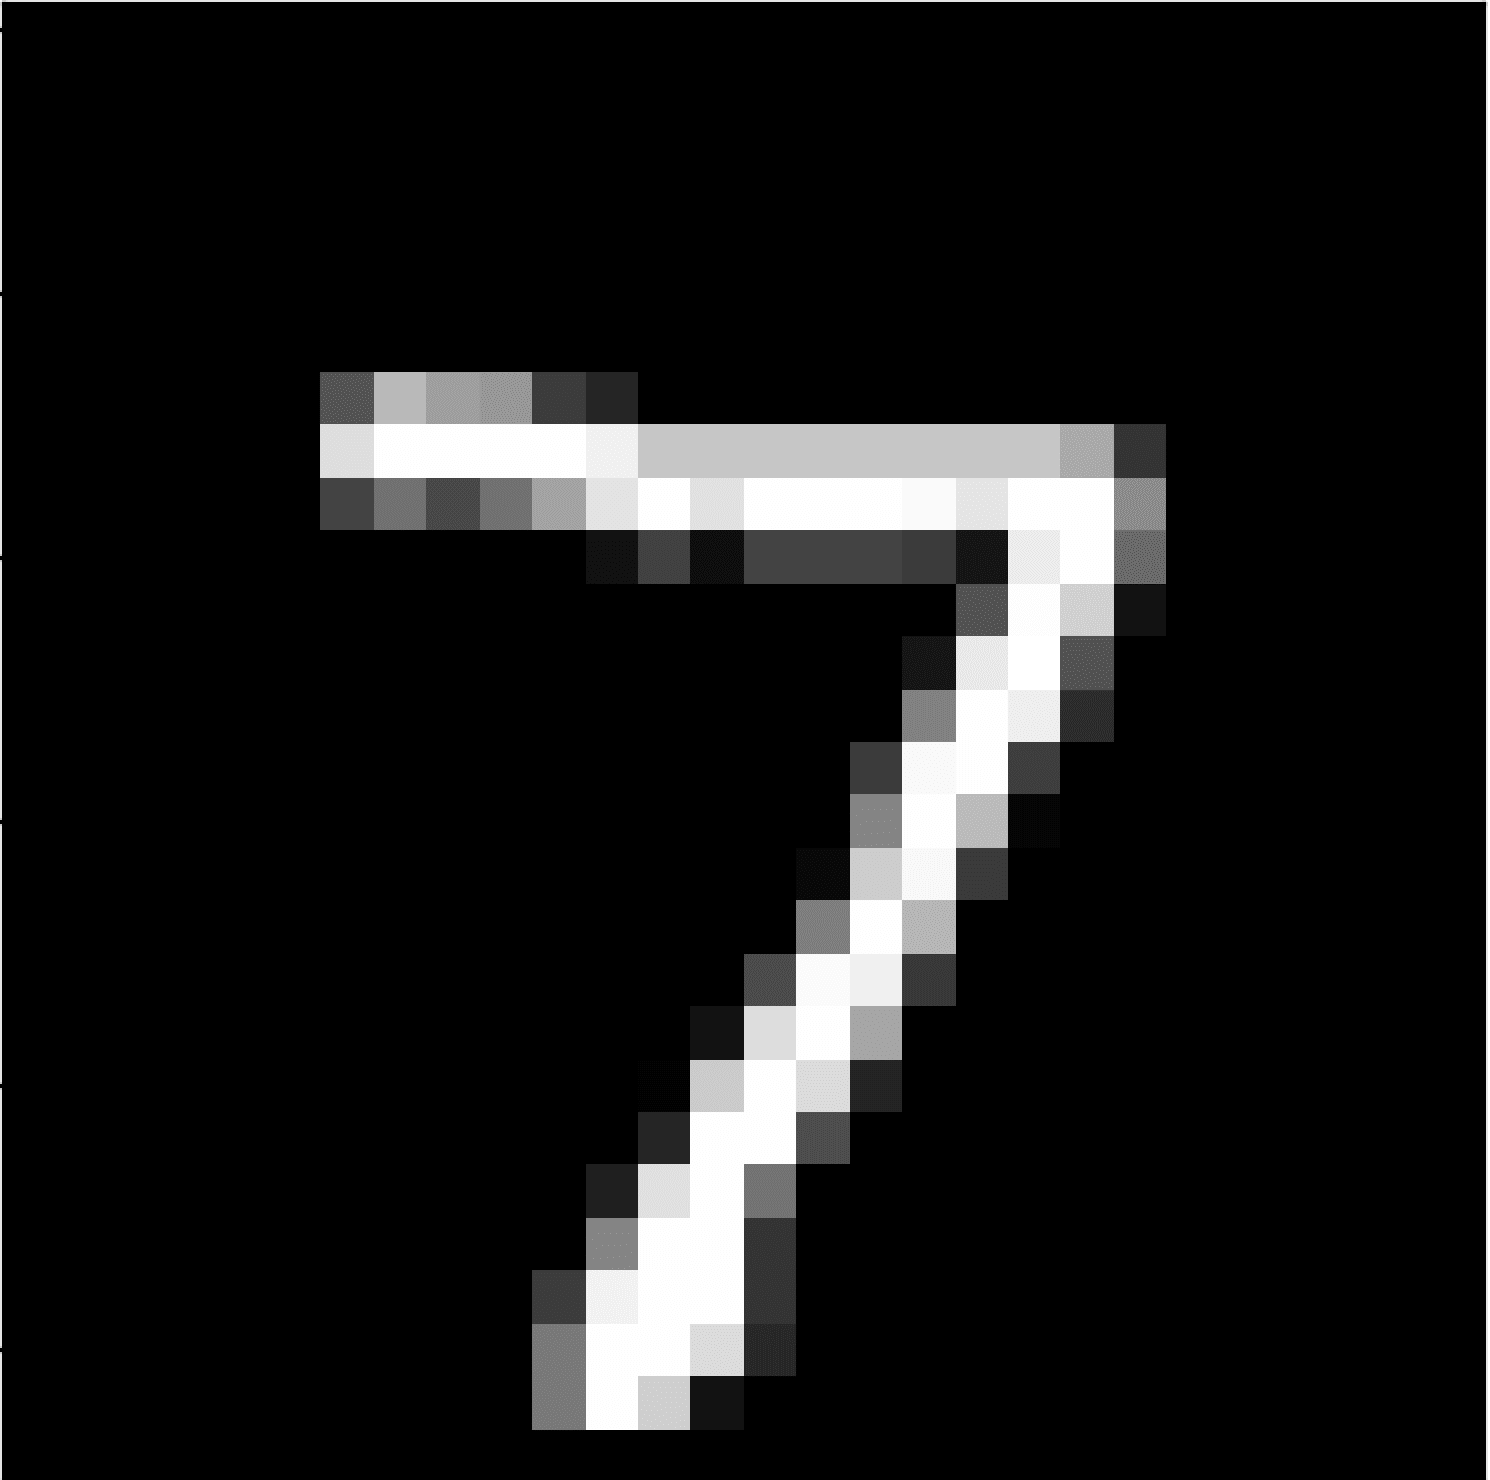

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(1480, 1490, 3)

In [ ]:
# lets convert the image in to the grayscale image

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(1480, 1490)

In [ ]:
# lets resize the image
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
input_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(input_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 50ms/step
[[1.0482855e-01 1.7854920e-07 8.3742496e-03 8.2683814e-01 1.7641662e-08
  3.8078588e-03 3.7525588e-10 9.9997079e-01 1.4471779e-02 2.6828298e-02]]


In [ ]:
input_prediction_label = np.argmax(input_prediction)

In [ ]:
print(input_prediction_label)

7


**Predictive System**

Path of the image to be predicted: /content/sample_image.png


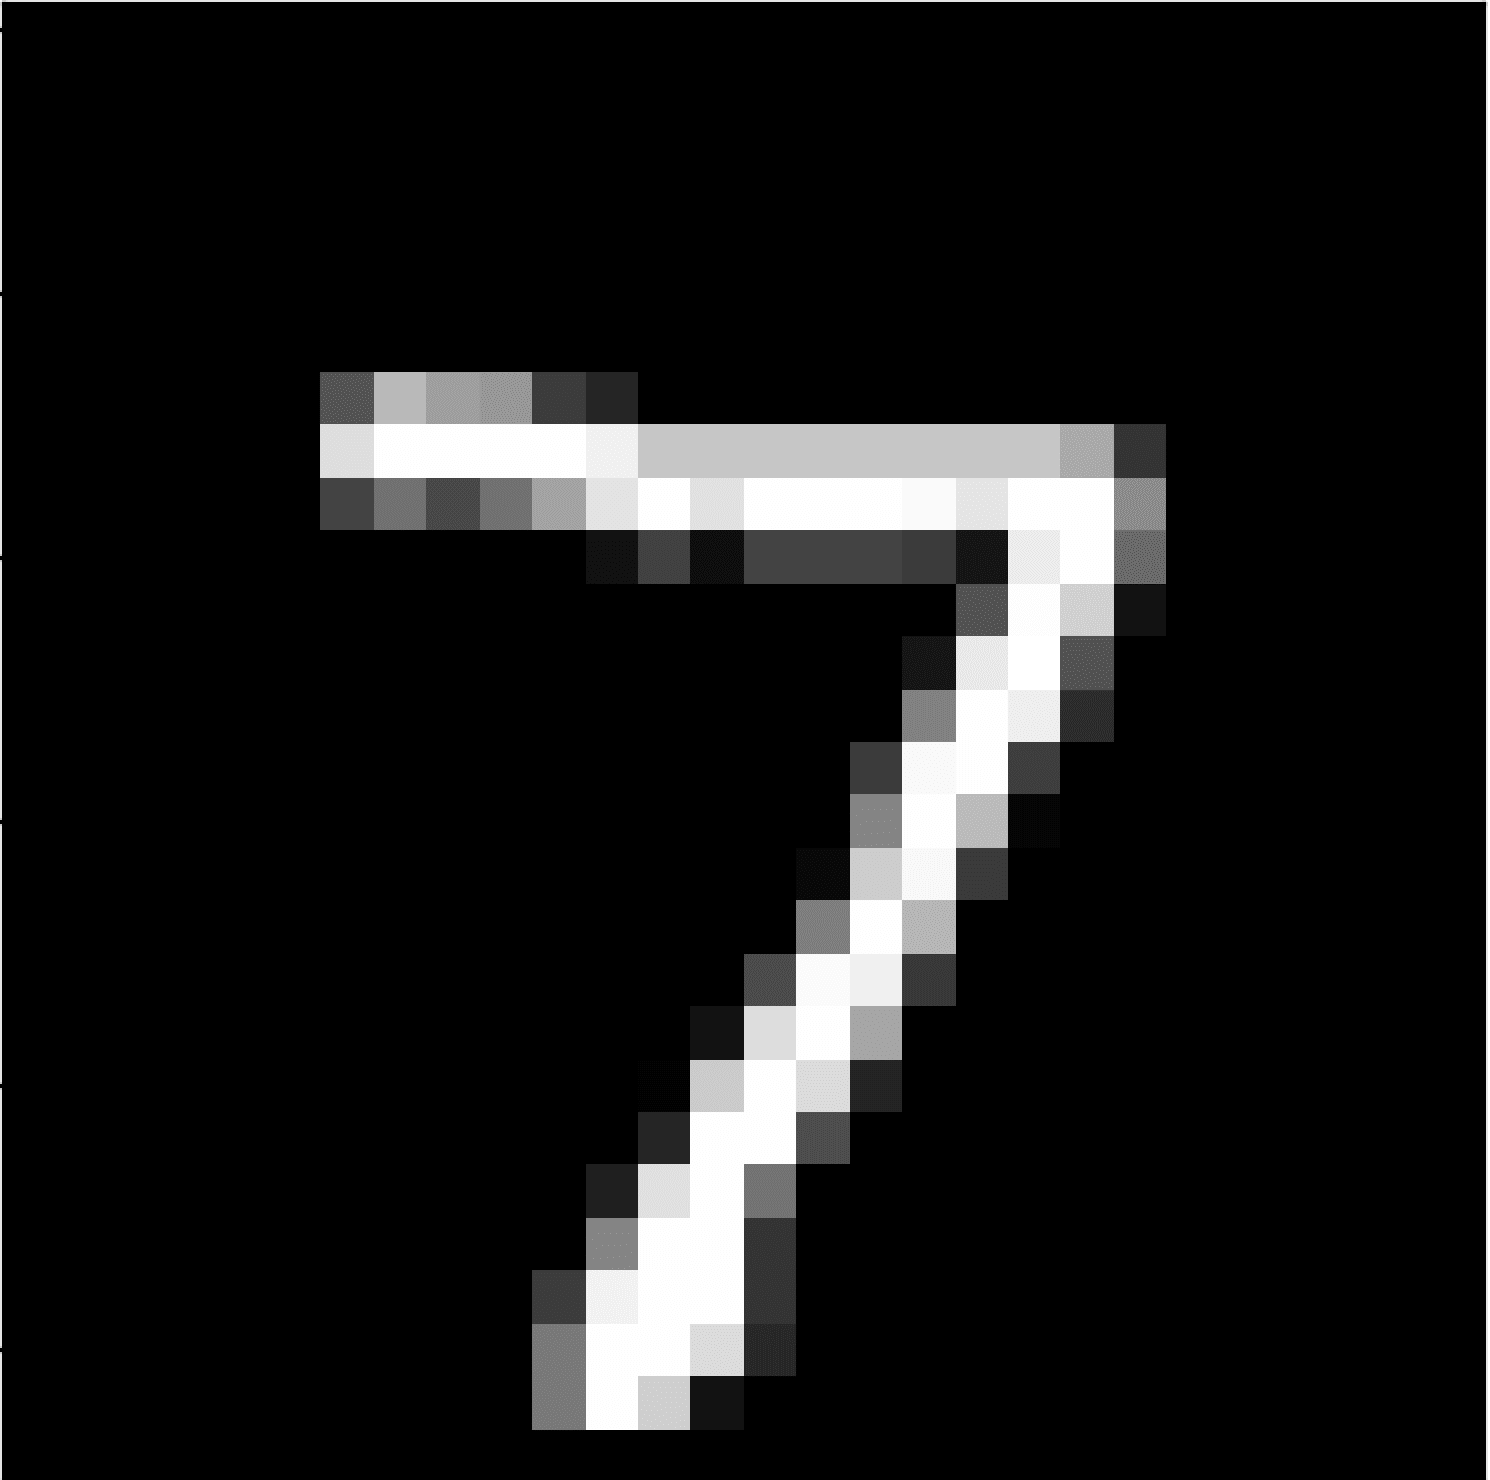

1/1 [==============================] - 0s 16ms/step
The Handwritten Digit is recognised as  7


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize.shape

cv2_imshow(input_image_resize)

input_image_resize = input_image_resize/255

input_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(input_reshaped)

input_prediction_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ',input_prediction_label)